## <font color = darkblue> This is a demonstration of Gradient Descent
- The program creates a hypothetical example of a simple linear regression problem
- It iteratively updates weight using GD

In [1]:
# ------------------------
# Importing dependencies
# ------------------------

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 
sns.set(rc={'figure.figsize':(11,8)})
# pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.display.float_format = '{:.2f}'.format


## GD on a Simple Linear Regression (SLR)

In [2]:

# ---------------------------------------------------------
# MSE function
# An alternative is to use sklearn.metrics.mean_squared_error
# ---------------------------------------------------------

def mse(x, y, b0, b1):
    y_predicted = b0 + b1*x
    error = y - y_predicted
    squared_error = error**2
    mse = np.mean(squared_error)
    return mse

# ---------------------------------------------------------
# Gradient function
# This calculates the GD adjustment at each step
# ---------------------------------------------------------
def gradients(x, y, b0, b1):
    N = len(x)
    b0_gradient = -2*np.sum(y - (b0 + b1*x))/N
    b1_gradient = -2*np.sum(x*(y - (b0 + b1*x)))/N
    return b0_gradient, b1_gradient



In [8]:
# -----------------------------
# Initialize the coefficients
# -----------------------------
b0 = 0
b1 = 0

# ----------------------------------------------------------
# Learning  rate
# The speed at which the cost comes does the parabolic cost function
# ----------------------------------------------------------
lr = 0.01

# ----------------------------------------------------------
# Lists for storing Loss and coefficients
# ----------------------------------------------------------
loss = []
b0_list = []
b1_list = []

# ---------------------------------------------
# Generating simple linear regression data 
# Note that the coeficients are 3(beta 0) and 2 (beta 1)
# ---------------------------------------------

x = np.arange(0,10,0.1)
y = 2*x + 3 + np.random.normal(0,2,len(x))


len(x), len(y)

(100, 100)

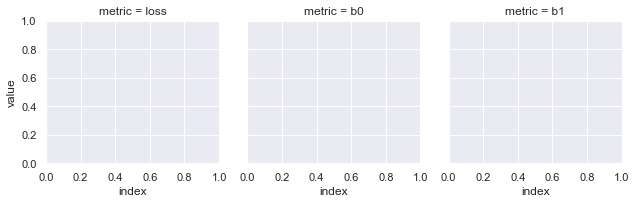

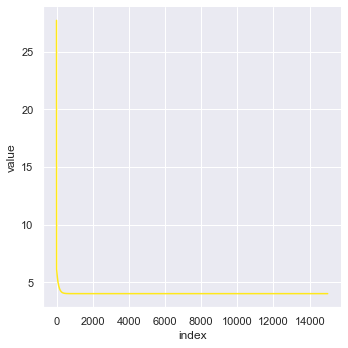

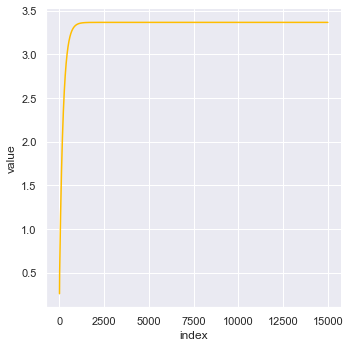

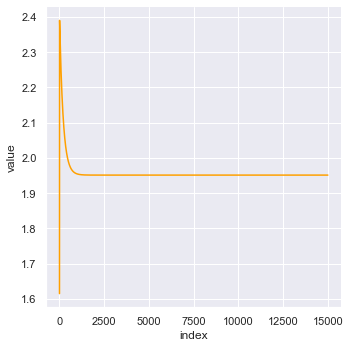

In [14]:
# --------------------------------------------------
# Repeated descent of the gradient through iterations
# --------------------------------------------------

for i in range(1000):
    b0_gradient, b1_gradient = gradients(x, y, b0, b1)

# -----------------------------------    
#     Adjusting the coefficients
# -----------------------------------    
    b0 = b0 - lr*b0_gradient
    b1 = b1 - lr*b1_gradient

# -----------------------------------    
# appending coefficients and the loss values 
# -----------------------------------    
    loss.append(mse(x, y, b0, b1))
    b0_list.append(b0)
    b1_list.append (b1)
    

# ------------------------------------    
# Stacking the above three in a df    
# ------------------------------------    

ndf = pd.DataFrame()
ndf["loss"]= loss
ndf["b0"]= b0_list
ndf["b1"]= b1_list

n2df= ndf.stack().reset_index()
n2df.columns = ['index', 'metric', 'value']

# ------------------------------------    
# Create a grid of plots
# ------------------------------------    
grid = sns.FacetGrid(n2df, col="metric", hue="metric", palette="Wistia")

grid.map(sns.relplot, "index", "value", kind="line")

plt.show()



## <font color = darkblue> The same demonstration with multiple linear regression

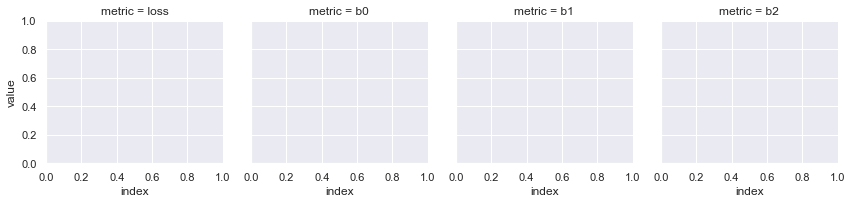

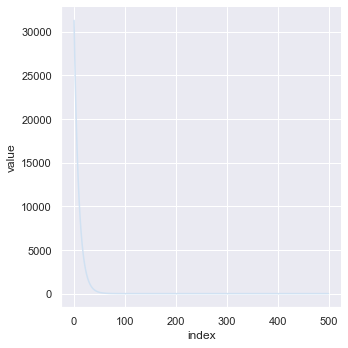

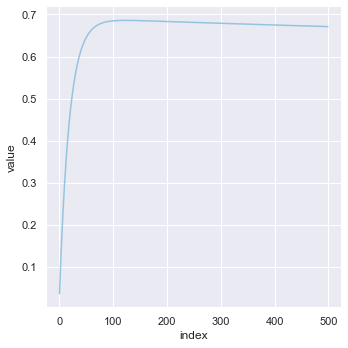

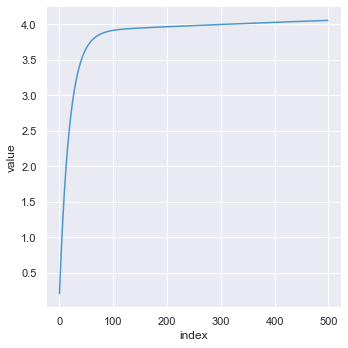

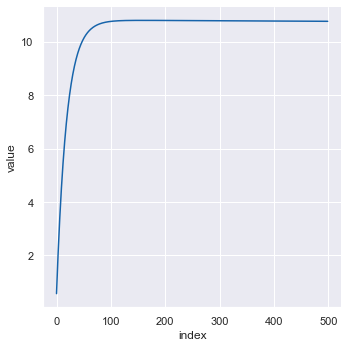

In [59]:
def gradients(x1,x2, y, b0, b1, b2):
    N = len(x1)
    b0_gradient = -2*np.sum(y - (b0 + b1*x1 + b2*x2))/N
    b1_gradient = -2*np.sum(x1*(y - (b0 + b1*x1+ b2*x2)))/N
    b2_gradient = -2*np.sum(x2*(y - (b0 + b1*x1+ b2*x2)))/N
    return b0_gradient, b1_gradient, b2_gradient

def mse(x1, x2,y, b0, b1,b2):
    y_predicted = b0 + b1*x1 + b2*x2
    error = y - y_predicted
    squared_error = error**2
    mse = np.mean(squared_error)
    return mse

# Initialize the coefficients
b0, b1, b2 = 0,0,0

# Learning  rate
lr = 0.0001

# Lists for loss and coefficients
loss, b0_list,b1_list,b2_list = [],[],[],[]

# ---------------------------------------------
# Generating multiple linear regression data 
# ---------------------------------------------

x1 = np.arange(0,10,0.1)
x2 = np.arange(10,20,0.1)
y = 7+5*x1 + 10*x2  + np.random.normal(0,2,len(x1))

# # Creating a list of the above three
# listofcols = [y,x1,x2]

# # creating df
# df = pd.DataFrame(listofcols).transpose()

# # Name the columns
# df.columns = ['y', 'x1', 'x2']

# # # # --------------------------------------------------
# # # # Iterations and repeated descent of the gradient
# # # # --------------------------------------------------

for i in range(500):
    b0_gradient, b1_gradient, b2_gradient = gradients(x1,x2, y, b0, b1, b2)
#     Adjusting the coefficients
    b0 = b0 - lr*b0_gradient
    b1 = b1 - lr*b1_gradient
    b2 = b2 - lr*b2_gradient
#     print(b0, b1, b2)

    
# # appending coefficients and the loss values 
    loss.append(mse(x1,x2, y, b0, b1,b2))
    b0_list.append(b0)
    b1_list.append (b1)
    b2_list.append (b2)

# print(loss)    

# # # ------------------------------------    
# # # Stacking the above three in a df    
# # # ------------------------------------    

ndf = pd.DataFrame()
ndf["loss"]= loss
ndf["b0"]= b0_list
ndf["b1"]= b1_list
ndf["b2"]= b2_list
n2df= ndf.stack().reset_index()
n2df.columns = ['index', 'metric', 'value']

# # # # ------------------------------------    
# # # # Create a grid of plots
# # # # ------------------------------------    
grid = sns.FacetGrid(n2df, col="metric", hue="metric", palette="Blues")

grid.map(sns.relplot, "index", "value", kind="line")

plt.show()
# ndf

## <font color = darkred> Repeat the above demonstration for MLR with four independent features